In [ ]:
import stVGP
import scanpy as sc
import pandas as pd
import numpy as np
import anndata as ad
import os

import warnings
warnings.filterwarnings("ignore")

d:\anaconda\envs\xw_cuda117\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
count = pd.read_csv("C:/Users/wzd/Desktop/Alignment Domain Prediction/admb/Raw_data/GSE147747_expr_raw_counts_table.tsv",
                    sep="\t", index_col=0)

meta = pd.read_csv("C:/Users/wzd/Desktop/Alignment Domain Prediction/admb/Raw_data/GSE147747_meta_table.tsv",
                   sep="\t", index_col=0)

adata_st_all = ad.AnnData(X = count.values)
adata_st_all.obs.index = count.index
adata_st_all.obs = meta.loc[adata_st_all.obs.index]
adata_st_all.var.index = count.columns

slice_use = ['01A', '02A', '03A', '04B', '05A', '06B', '07A', '08B', '09A', '10B',
 '11A', '12A', '13B', '14A', '15A', '16A', '17A', '18A', '19A', '20B',
 '21A', '22A', '23A', '24A', '25A', '26A', '27A', '28A', '29A', '30A',
 '31A', '32A', '33A', '34A', '35A']

meta_slice = pd.read_csv("C:/Users/wzd/Desktop/Alignment Domain Prediction/admb/Raw_data/slicestable.tsv",
                        index_col=0, sep="\t")

slice_AP = [float(meta_slice.loc[s]['AP']) * 1000 for s in slice_use]
slice_dist_micron = [-(slice_AP[i+1] - slice_AP[i]) for i in range(len(slice_AP)-1)]
adata_st_all = adata_st_all[[s in slice_use for s in adata_st_all.obs.section_index.values]]
print(adata_st_all)

View of AnnData object with n_obs × n_vars = 17088 × 23371
    obs: 'section_index', 'stereo_ML', 'stereo_DV', 'stereo_AP', 'HE_X', 'HE_Y', 'ABA_acronym', 'ABA_name', 'ABA_parent', 'nuclei_segmented', 'spot_radius', 'passed_QC', 'cluster_id', 'cluster_name'


In [3]:
adata_st_all.obsm['spatial'] = np.concatenate((adata_st_all.obs['HE_X'].values.reshape(-1, 1),
                                               adata_st_all.obs['HE_Y'].values.reshape(-1, 1)), axis=1)
adata_st_list_raw = []

for slice_id in sorted(set(adata_st_all.obs.section_index.values)):
    adata_st_i = adata_st_all[adata_st_all.obs.section_index.values == slice_id]

    array_col = np.array([float(loc.split("_")[1].split("x")[0]) for loc in adata_st_i.obs.index])
    if slice_id == '01A':
        array_col = array_col - 0.3
    array_row = np.array([float(loc.split("_")[1].split("x")[1]) for loc in adata_st_i.obs.index])

    adata_st_i.obs['array_col'] = np.round(array_col)
    adata_st_i.obs['array_row'] = np.round(array_row)
    adata_st_i.obsm['loc_use'] = np.concatenate((adata_st_i.obs['array_row'].values.reshape(-1, 1),
                                                 adata_st_i.obs['array_col'].values.reshape(-1, 1)), axis=1)
    adata_st_list_raw.append(adata_st_i.copy())
for i in range(1, 6): # adjust spatial locations
        adata_st_list_raw[i].obsm['loc_use'] = np.concatenate((adata_st_list_raw[i].obsm['loc_use'][:, 0].reshape(-1, 1),
                                                           2*np.mean(adata_st_list_raw[i].obsm['loc_use'][:, 1])-adata_st_list_raw[i].obsm['loc_use'][:, 1].reshape(-1, 1)), axis=1)


In [2]:
count = pd.read_csv("C:/Users/wzd/Desktop/Alignment Domain Prediction/admb/Raw_data/GSE147747_expr_raw_counts_table.tsv",
                    sep="\t", index_col=0)

meta = pd.read_csv("C:/Users/wzd/Desktop/Alignment Domain Prediction/admb/Raw_data/GSE147747_meta_table.tsv",
                   sep="\t", index_col=0)

adata_st_all = ad.AnnData(X = count.values)
adata_st_all.obs.index = count.index
adata_st_all.obs = meta.loc[adata_st_all.obs.index]
adata_st_all.var.index = count.columns

slice_use = ['01A', '02A', '03A', '04B', '05A', '06B', '07A', '08B', '09A', '10B',
 '11A', '12A', '13B', '14A', '15A', '16A', '17A', '18A', '19A', '20B',
 '21A', '22A', '23A', '24A', '25A', '26A', '27A', '28A', '29A', '30A',
 '31A', '32A', '33A', '34A', '35A']

meta_slice = pd.read_csv("C:/Users/wzd/Desktop/Alignment Domain Prediction/admb/Raw_data/slicestable.tsv",
                        index_col=0, sep="\t")

slice_AP = [float(meta_slice.loc[s]['AP']) * 1000 for s in slice_use]
slice_dist_micron = [-(slice_AP[i+1] - slice_AP[i]) for i in range(len(slice_AP)-1)]
adata_st_all = adata_st_all[[s in slice_use for s in adata_st_all.obs.section_index.values]]
sc.pp.filter_cells(adata_st_all, min_genes=1)
adata_st_all.obsm['spatial'] = np.concatenate((adata_st_all.obs['HE_X'].values.reshape(-1, 1),
                                               adata_st_all.obs['HE_Y'].values.reshape(-1, 1)), axis=1)
adata_st_list_raw = []

for slice_id in sorted(set(adata_st_all.obs.section_index.values)):
    adata_st_i = adata_st_all[adata_st_all.obs.section_index.values == slice_id]

    array_col = np.array([float(loc.split("_")[1].split("x")[0]) for loc in adata_st_i.obs.index])
    if slice_id == '01A':
        array_col = array_col - 0.3
    array_row = np.array([float(loc.split("_")[1].split("x")[1]) for loc in adata_st_i.obs.index])

    adata_st_i.obs['array_col'] = np.round(array_col)
    adata_st_i.obs['array_row'] = np.round(array_row)
    adata_st_i.obsm['loc_use'] = np.concatenate((adata_st_i.obs['array_row'].values.reshape(-1, 1),
                                                 adata_st_i.obs['array_col'].values.reshape(-1, 1)), axis=1)
    adata_st_list_raw.append(adata_st_i.copy())
for i in range(1, 6): # adjust spatial locations
        adata_st_list_raw[i].obsm['loc_use'] = np.concatenate((adata_st_list_raw[i].obsm['loc_use'][:, 0].reshape(-1, 1),
                                                           2*np.mean(adata_st_list_raw[i].obsm['loc_use'][:, 1])-adata_st_list_raw[i].obsm['loc_use'][:, 1].reshape(-1, 1)), axis=1)


In [ ]:
adata_st_list = stVGP.st_preprocess(adata_st_list_raw,
                                       n_hvg_group=8000,
                                       min_genes = 1, 
                                       min_cells=100,
                                       flavor = "seurat")

Finding highly variable genes...


In [ ]:
for ref_index in range(len(adata_st_list)):
    if not os.path.exists("C:/Users/wzd/Desktop/Alignment Domain Prediction/admb/select_gene/{}".format(ref_index)):
        os.makedirs("C:/Users/wzd/Desktop/Alignment Domain Prediction/admb/select_gene/{}".format(ref_index))
    
    adata_st_list = stVGP.select_gene(adata_st_list,
                                    ref_adata_num=ref_index,
                                    spot_make=2,
                                    key_words = 'loc_use',
                                    save_data=False,
                                    savepath='C:/Users/wzd/Desktop/Alignment Domain Prediction/admb/select_gene/{}/'.format(ref_index))

In [6]:
file_path = 'C:/Users/wzd/Desktop/Alignment Domain Prediction/admb/select_gene/'
gene_input_list = []
for i in range(len(adata_st_list)):
    gene_morans_result = np.genfromtxt(file_path + '/{}/gene_morans_4.txt'.format(i),
                                   dtype=np.str0,
                                   skip_header=1,
                                   delimiter ='\t')

    sorted_indices = np.argsort(gene_morans_result[:,-1])[::-1]
    top_morans_indices = sorted_indices[:1]
    select_gene_final = gene_morans_result[top_morans_indices,0]
    gene_input_list.append(select_gene_final)

In [ ]:
adata_st_list = stVGP.gene_rigid_alignment(
        gene_input = gene_input_list[0],
        stadata_input = adata_st_list,
        ini_spatial = 'loc_use',
        add_spatial = 'align_spatial',
        align_model = "sequential_alignment",
        gene_input_list = gene_input_list,
        ref_label = 0,
        align_method = 'optimize',
        icp_iterations = 20,                          
        maxiter = 300)

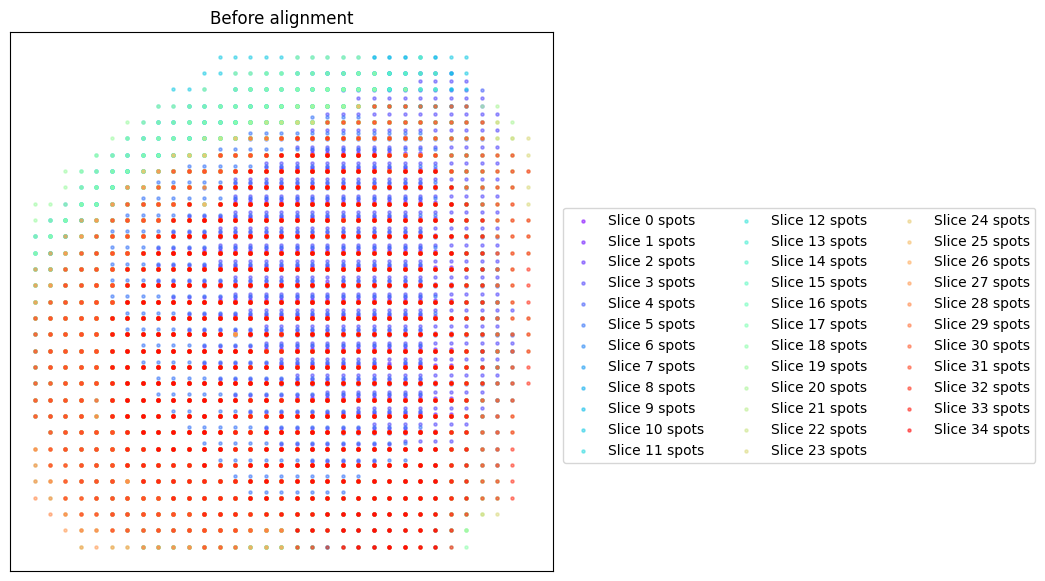

In [8]:
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib

cmap = cm.get_cmap('rainbow', len(adata_st_list))
colors_list = [matplotlib.colors.rgb2hex(cmap(i)) for i in range(len(adata_st_list))]

# Plot spots before alignment
plt.figure(figsize=(7, 7))
plt.title("Before alignment")
for i in range(len(adata_st_list)):
    plt.scatter(adata_st_list[i].obsm['loc_use'][:, 0], 
        adata_st_list[i].obsm['loc_use'][:, 1], 
        c=colors_list[i],
        label="Slice %d spots" % i, s=5., alpha=0.5)
ax = plt.gca()
ax.set_ylim(ax.get_ylim()[::-1])
plt.xticks([])
plt.yticks([])
plt.legend(loc=(1.02, .2), ncol=(len(adata_st_list)//13 + 1))
plt.show()

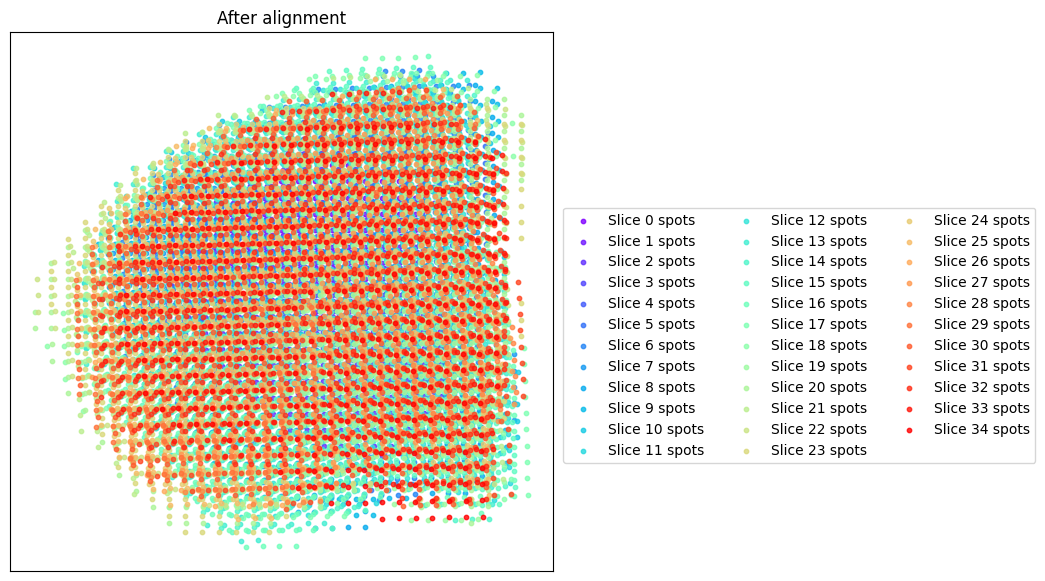

In [9]:
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib

cmap = cm.get_cmap('rainbow', len(adata_st_list))
colors_list = [matplotlib.colors.rgb2hex(cmap(i)) for i in range(len(adata_st_list))]

# Plot spots before alignment
plt.figure(figsize=(7, 7))
plt.title("After alignment")
for i in range(len(adata_st_list)):
    plt.scatter(adata_st_list[i].obsm['align_spatial'][:, 0], 
        adata_st_list[i].obsm['align_spatial'][:, 1], 
        c=colors_list[i],
        label="Slice %d spots" % i, s=10, alpha=0.8)
ax = plt.gca()
ax.set_ylim(ax.get_ylim()[::-1])
plt.xticks([])
plt.yticks([])
plt.legend(loc=(1.02, .2), ncol=(len(adata_st_list)//13 + 1))
plt.show()

In [9]:
# for adata_index in range(len(adata_st_list)):
#     adata_st_list[adata_index].write("C:/Users/wzd/Desktop/Alignment Domain Prediction/admb/{}_slice.h5ad".format(slice_use[adata_index]))

In [24]:
# Domain and batch effect
import scanpy as sc
import torch
import anndata as ad
# Re-enter data
data_path = 'C:/Users/wzd/Desktop/Alignment Domain Prediction/admb/'

slice_use = ['01A', '02A', '03A', '04B', '05A', '06B', '07A', '08B', '09A', '10B',
                        '11A', '12A', '13B', '14A', '15A', '16A', '17A', '18A', '19A', '20B',
                        '21A', '22A', '23A', '24A', '25A', '26A', '27A', '28A', '29A', '30A',
                        '31A', '32A', '33A', '34A', '35A']

adata_Adult_mouse_brain = []

for slice_name in slice_use:
    file_path = data_path + str(slice_name) + '_slice.h5ad'
    adata = sc.read(file_path)
    adata_Adult_mouse_brain.append(adata)

adata_concat = ad.concat(adata_Adult_mouse_brain)
adata_concat = adata_concat[~adata_concat.obs['cluster_name'].isna()]

ground_truth = np.empty(len(adata_concat.obs['cluster_name']),dtype=object)
for index in range(len(ground_truth)):
    cluster_I = adata_concat.obs['cluster_name'][index].split('-')[0]
    if cluster_I == 'Mixed':
        cluster_I = adata_concat.obs['cluster_name'][index].split('(')[1][:-1]
        ground_truth[index] = cluster_I
    else:
        ground_truth[index] = cluster_I
ground_truth = ground_truth.reshape(-1,1)
adata_concat.obsm['ground_truth'] = ground_truth

adata_list = []
for slice_id in sorted(set(adata_concat.obs.section_index.values)):
    adata_st_i = adata_concat[adata_concat.obs.section_index.values == slice_id]
    adata_list.append(adata_st_i.copy())

adata_dim = []
for adata_index in range(len(adata_list)):
    adata_dim.append(adata_list[adata_index].shape[0])
adata_dim = np.cumsum(adata_dim)
adata_dim = np.insert(adata_dim,0,0)

In [ ]:
# Preprocessed data
# If the data was not processed during the alignment process, perform preliminary processing of the data
slice_matrix,adj_matrix = stVGP.adata_preprocess_adjnet(
        input_adata = adata_list,                                 
        align_model = 'sequential_alignment',    
        ref_label = 0,                               
        spatial_label = 'align_spatial',              
        add_net_keywords_self = 'adj_spatial_net',    
        n_neighbors = 15,                             
        no_cross = False
        )


In [ ]:
recon_x, embedding, model_params,logvar = stVGP.train_stVGP(
        ST_need_reconstruction_matrix = slice_matrix,
        all_spatial_net = adj_matrix,
        lr = 0.001,
        weight_decay = 0.0001,
        training_epoch = 600,
        num_heads = 1,
        device = torch.device('cuda' if torch.cuda.is_available() else 'cpu'),
        save_model = False,
        save_model_path = 'path',
        hidden_embedding = [128,28],
        random_seed = 502,
        optimize_method = 'adam',
        whether_gradient_clipping = False,
        gradient_clipping = 5.0,
        all_gat = False)

Model training


100%|██████████| 600/600 [00:31<00:00, 18.92it/s]


In [ ]:
# Save embedded layer data
# np.savetxt('C:/Users/wzd/Desktop/Alignment Domain Prediction/admb/Domain/embedding.txt',embedding,fmt='%s')

In [16]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import adjusted_rand_score

embedding = np.loadtxt('C:/Users/wzd/Desktop/Alignment Domain Prediction/admb/Domain/embedding.txt')

for adata_index in range(len(adata_list)):
    if adata_index == 0:
        ground_truth_label = np.array(adata_list[adata_index].obsm['ground_truth'])
    else:
        ground_truth_label = np.vstack((ground_truth_label,adata_list[adata_index].obsm['ground_truth']))

cluster_num = len(np.unique(ground_truth_label))
true_labels = ground_truth_label.ravel()

np.random.seed(11)
gm = GaussianMixture(n_components=cluster_num, covariance_type='tied', init_params='kmeans')
y = gm.fit_predict(embedding, y=None)
ari = adjusted_rand_score(true_labels,y)
print(ari)

0.5497558196820788


In [22]:
AP_z = [0]
for i in range(len(slice_dist_micron)):
    AP_z.append(AP_z[i] + slice_dist_micron[i])

for adata_index in range(len(adata_list)):
    if adata_index == 0:
        spatial_spots = np.array(adata_list[adata_index].obsm['align_spatial'])
        spatial_z = np.array([AP_z[adata_index]]*adata_list[adata_index].shape[0]).reshape(-1,1)
    else:
        spatial_spots = np.vstack((spatial_spots,adata_list[adata_index].obsm['align_spatial']))
        spatial_z = np.vstack((spatial_z,np.array([AP_z[adata_index]]*adata_list[adata_index].shape[0]).reshape(-1,1)))

spatial_spots = np.hstack((spatial_spots,spatial_z))

# np.savetxt('C:/Users/wzd/Desktop/Alignment Domain Prediction/admb/Domain/alignment_spatial.txt',spatial_spots,fmt='%s')
# np.savetxt('C:/Users/wzd/Desktop/Alignment Domain Prediction/admb/Domain/cluster.txt',y,fmt='%s')
# torch.save(model_params,"C:/Users/wzd/Desktop/Alignment Domain Prediction/admb/Domain/model.pth")

In [ ]:
# Gene prediction
# Masked slices prediction

spatial = np.loadtxt('C:/Users/wzd/Desktop/Alignment Domain Prediction/admb/Domain/alignment_spatial.txt')
embedding = np.loadtxt("C:/Users/wzd/Desktop/Alignment Domain Prediction/admb/Domain/embedding.txt")

slice_use = ['01A', '02A', '03A', '04B', '05A', '06B', '07A', '08B', '09A', '10B',
 '11A', '12A', '13B', '14A', '15A', '16A', '17A', '18A', '19A', '20B',
 '21A', '22A', '23A', '24A', '25A', '26A', '27A', '28A', '29A', '30A',
 '31A', '32A', '33A', '34A', '35A']

for slice_index,slice_name in enumerate(slice_use):

    if slice_index in [0,1,2,31,32,33,34]:
        continue

    Train_spatial_up = spatial[:adata_dim[slice_index]]
    Train_spatial_down = spatial[adata_dim[slice_index+1]:]

    Embedding_up = embedding[:adata_dim[slice_index]]
    Embedding_down = embedding[adata_dim[slice_index+1]:]

    Pred_spatial = spatial[adata_dim[slice_index]:adata_dim[slice_index+1]]
    Pred_embedding_true = embedding[adata_dim[slice_index]:adata_dim[slice_index+1]]

    Train_spatial = np.vstack((Train_spatial_up,Train_spatial_down))
    Train_embedding = np.vstack((Embedding_up,Embedding_down))

    pred_embedding = stVGP.get_3D_prediction(
                train_coordinates = Train_spatial,
                embedding = Train_embedding,
                spatial_pred = Pred_spatial,
                noise = False,
                noise_value = 0.00001,
                constant_value = 1.0,
                Rbf_value = 1024)
    
    print(pred_embedding.shape)

    # np.savetxt('C:/Users/wzd/Desktop/Alignment Domain Prediction/admb/Prediction and 3D/{}_embedding.txt'.format(slice_use[slice_index]),pred_embedding,fmt='%s')

(150, 28)
(240, 28)
(269, 28)
(326, 28)
(361, 28)
(401, 28)
(488, 28)
(470, 28)
(490, 28)
(518, 28)
(493, 28)
(505, 28)
(509, 28)
(578, 28)
(556, 28)
(557, 28)
(577, 28)
(572, 28)
(586, 28)
(535, 28)
(616, 28)
(585, 28)
(573, 28)
(611, 28)
(506, 28)
(547, 28)
(506, 28)
(455, 28)
(457, 28)
(525, 28)
(546, 28)
(523, 28)
(483, 28)
(477, 28)
(427, 28)


In [27]:
# Gene prediction
# reload data
import scanpy as sc
import numpy as np
import torch
import anndata as ad

import numpy as np
from scipy.stats import spearmanr, kendalltau, pearsonr
from scipy.sparse import isspmatrix

data_path = 'C:/Users/wzd/Desktop/Alignment Domain Prediction/admb/'

slice_use = ['01A', '02A', '03A', '04B', '05A', '06B', '07A', '08B', '09A', '10B',
                        '11A', '12A', '13B', '14A', '15A', '16A', '17A', '18A', '19A', '20B',
                        '21A', '22A', '23A', '24A', '25A', '26A', '27A', '28A', '29A', '30A',
                        '31A', '32A', '33A', '34A', '35A']

adata_Adult_mouse_brain = []

for slice_name in slice_use:
    file_path = data_path + str(slice_name) + '_slice.h5ad'
    adata = sc.read(file_path)
    adata_Adult_mouse_brain.append(adata)

adata_concat = ad.concat(adata_Adult_mouse_brain)
adata_concat = adata_concat[~adata_concat.obs['cluster_name'].isna()]

ground_truth = np.empty(len(adata_concat.obs['cluster_name']),dtype=object)
for index in range(len(ground_truth)):
    cluster_I = adata_concat.obs['cluster_name'][index].split('-')[0]
    if cluster_I == 'Mixed':
        cluster_I = adata_concat.obs['cluster_name'][index].split('(')[1][:-1]
        ground_truth[index] = cluster_I
    else:
        ground_truth[index] = cluster_I
ground_truth = ground_truth.reshape(-1,1)
adata_concat.obsm['ground_truth'] = ground_truth

adata_list = []
for slice_id in sorted(set(adata_concat.obs.section_index.values)):
    adata_st_i = adata_concat[adata_concat.obs.section_index.values == slice_id]
    adata_list.append(adata_st_i.copy())

adata_dim = []
for adata_index in range(len(adata_list)):
    adata_dim.append(adata_list[adata_index].shape[0])
adata_dim = np.cumsum(adata_dim)
adata_dim = np.insert(adata_dim,0,0)

In [28]:
ini_embedding = np.loadtxt('C:/Users/wzd/Desktop/Alignment Domain Prediction/admb/Domain/embedding.txt')
prediction_embedding_01A = ini_embedding[adata_dim[0]:adata_dim[1]] 
prediction_embedding_02A = ini_embedding[adata_dim[1]:adata_dim[2]] 
prediction_embedding_03A = ini_embedding[adata_dim[2]:adata_dim[3]] 
prediction_embedding_32A = ini_embedding[adata_dim[-5]:adata_dim[-4]]
prediction_embedding_33A = ini_embedding[adata_dim[-4]:adata_dim[-3]]
prediction_embedding_34A = ini_embedding[adata_dim[-3]:adata_dim[-2]]
prediction_embedding_35A = ini_embedding[adata_dim[-2]:adata_dim[-1]]

In [ ]:
slice_matrix,adj_matrix = stVGP.adata_preprocess_adjnet(
                        input_adata = adata_list,
                        align_model = 'sequential_alignment',
                        spatial_label = 'align_spatial',
                        add_net_keywords_self = 'adj_spatial_net',
                        n_neighbors = 15,                             
                        no_cross = False)

for slice_index,slice_name in enumerate(slice_use):
    if slice_index in [0,1,2,31,32,33,34]:
        continue
    if slice_index == 3:
        prediction_embedding = np.loadtxt('C:/Users/wzd/Desktop/Alignment Domain Prediction/admb/Prediction and 3D/{}_embedding.txt'.format(slice_name))
    else:
        input_embedding = np.loadtxt('C:/Users/wzd/Desktop/Alignment Domain Prediction/admb/Prediction and 3D/{}_embedding.txt'.format(slice_name))
        prediction_embedding = np.vstack((prediction_embedding,input_embedding))
prediction_embedding = np.vstack((prediction_embedding_01A,prediction_embedding_02A,prediction_embedding_03A,prediction_embedding,prediction_embedding_32A,
                                  prediction_embedding_33A,prediction_embedding_34A,prediction_embedding_35A))
prediction_embedding = torch.tensor(prediction_embedding,dtype=torch.float32)
prediction_embedding.shape

torch.Size([17018, 28])

In [31]:
slice_matrix = torch.tensor(slice_matrix,dtype=torch.float32)
edge_list = []
edge_list.append(adj_matrix.row.tolist())
edge_list.append(adj_matrix.col.tolist())
adj_tensor = torch.LongTensor(edge_list)

In [33]:
model_path = 'C:/Users/wzd/Desktop/Alignment Domain Prediction/admb/Domain/' 
checkpoint = torch.load(model_path + 'model.pth')

In [ ]:
Gene_reconstruction = stVGP.gene_prediction(
    slice_matrix = slice_matrix,
    prediction_embedding = prediction_embedding,               
    adj_matrix = adj_tensor,                        
    checkpoint = checkpoint,                         
    model_layer = [slice_matrix.shape[1],128,28,1],                       
    all_gat = False,                            
    logvar = None,                            
    device = torch.device('cuda:0')
)

In [36]:
# np.savetxt('C:/Users/wzd/Desktop/Alignment Domain Prediction/admb/Prediction and 3D/Gene_reconstruction.txt',Gene_reconstruction,fmt='%s')